In [148]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

from scipy.integrate import cumulative_trapezoid

import warnings
warnings.filterwarnings("ignore")

In [149]:
x=0.5*math.pi
math.sin(x)+math.cos(x)

1.0

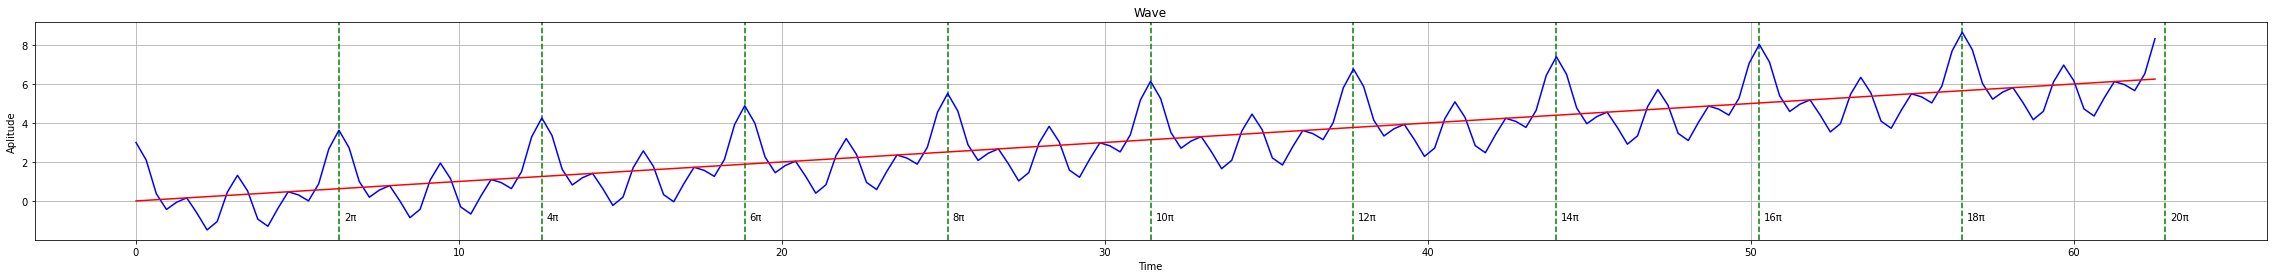

In [150]:
start=0
end=20*math.pi
inc=0.1*math.pi

time=np.arange(start,end,inc)
data=np.cos(time)+np.cos(2*time)+np.cos(4*time)+0.1*pow(time,1)
data2=0.1*time

plt.figure(figsize=(40,4))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Aplitude')
plt.grid(True, which='both')
plt.axvline(x=2*math.pi, color='green', linestyle='--')
plt.annotate("2π", (2*math.pi+0.15, -1))
plt.axvline(x=4*math.pi, color='green', linestyle='--')
plt.annotate("4π", (4*math.pi+0.15, -1))
plt.axvline(x=6*math.pi, color='green', linestyle='--')
plt.annotate("6π", (6*math.pi+0.15, -1))
plt.axvline(x=8*math.pi, color='green', linestyle='--')
plt.annotate("8π", (8*math.pi+0.15, -1))
plt.axvline(x=10*math.pi, color='green', linestyle='--')
plt.annotate("10π", (10*math.pi+0.15, -1))
plt.axvline(x=12*math.pi, color='green', linestyle='--')
plt.annotate("12π", (12*math.pi+0.15, -1))
plt.axvline(x=14*math.pi, color='green', linestyle='--')
plt.annotate("14π", (14*math.pi+0.15, -1))
plt.axvline(x=16*math.pi, color='green', linestyle='--')
plt.annotate("16π", (16*math.pi+0.15, -1))
plt.axvline(x=18*math.pi, color='green', linestyle='--')
plt.annotate("18π", (18*math.pi+0.15, -1))
plt.axvline(x=20*math.pi, color='green', linestyle='--')
plt.annotate("20π", (20*math.pi+0.15, -1))

plt.plot(time, data, color='blue')
plt.plot(time, data2, color='red')

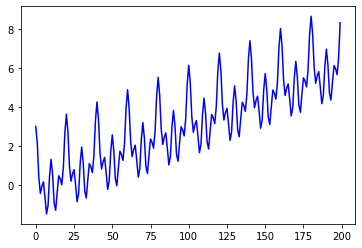

In [151]:
plt.plot(data[0:699], color='blue')

In [152]:
x = {'time': time, 'amplitude': data}
df = pd.DataFrame(data=x)
print(f"This dataset has {len(df)} datasets")
df.head(10)

This dataset has 200 datasets


,time,amplitude
0,0.000000,3.000000
1,0.314159,2.100506
2,0.628319,0.371849
3,0.942478,-0.436001
4,1.256637,-0.065319
5,1.570796,0.157080
6,1.884956,-0.620521
7,2.199115,-1.485908
8,2.513274,-1.057690
9,2.827433,0.449721


In [153]:
first_diff = df['amplitude'].diff()[1:]

In [154]:
first_diff

1     -0.899494
2     -1.728658
3     -0.807850
4      0.370682
5      0.222399
         ...   
195    0.840433
196   -0.159567
197   -0.307850
198    0.870682
199    1.791489
Name: amplitude, Length: 199, dtype: float64

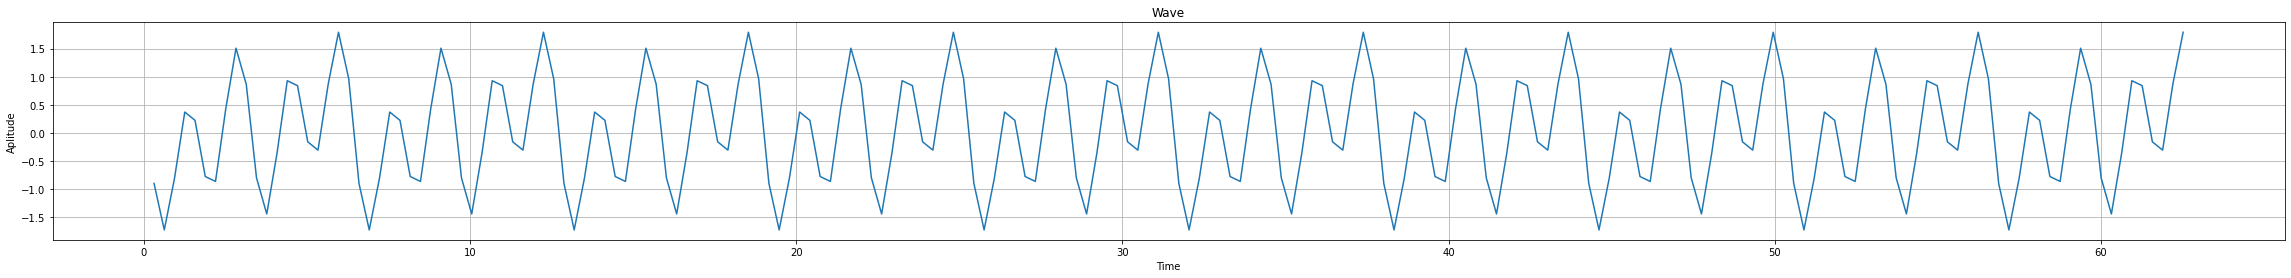

In [155]:
new_time=time[1:]

plt.figure(figsize=(40,4))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Aplitude')
plt.grid(True, which='both')
plt.plot(new_time,first_diff)

In [156]:
used_dataset = first_diff 
used_dataset

1     -0.899494
2     -1.728658
3     -0.807850
4      0.370682
5      0.222399
         ...   
195    0.840433
196   -0.159567
197   -0.307850
198    0.870682
199    1.791489
Name: amplitude, Length: 199, dtype: float64

<BarContainer object of 20 artists>

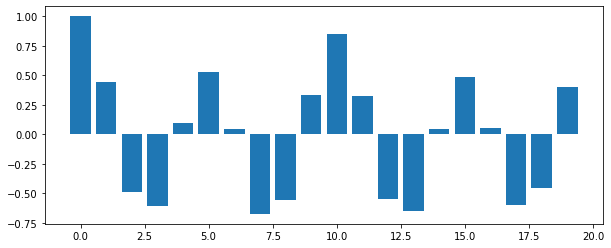

In [157]:
plt.figure(figsize=(10,4))
acf_vals = acf(used_dataset)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

In [158]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plt.figure(figsize=(20,10))
# plot_acf(used_dataset)
# plt.show()

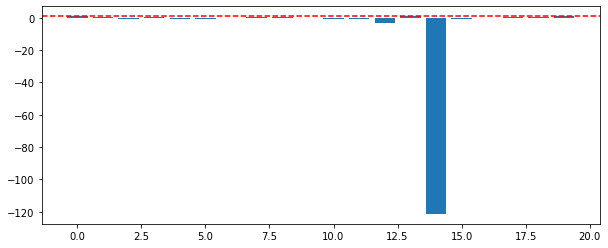

In [159]:
plt.figure(figsize=(10,4))
pacf_vals = pacf(used_dataset)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.axhline(y=1, color='red', linestyle='--')

p is 0 since it has no significant positive spikes
d is 1 from the first difference
q is 0 significant negative spikes
P is 1 since it has a significant positive spike
D is 0 from the first seasonal difference
Q is 1 significant negative seasonal spikes
m is 10 from the seasonal analysis


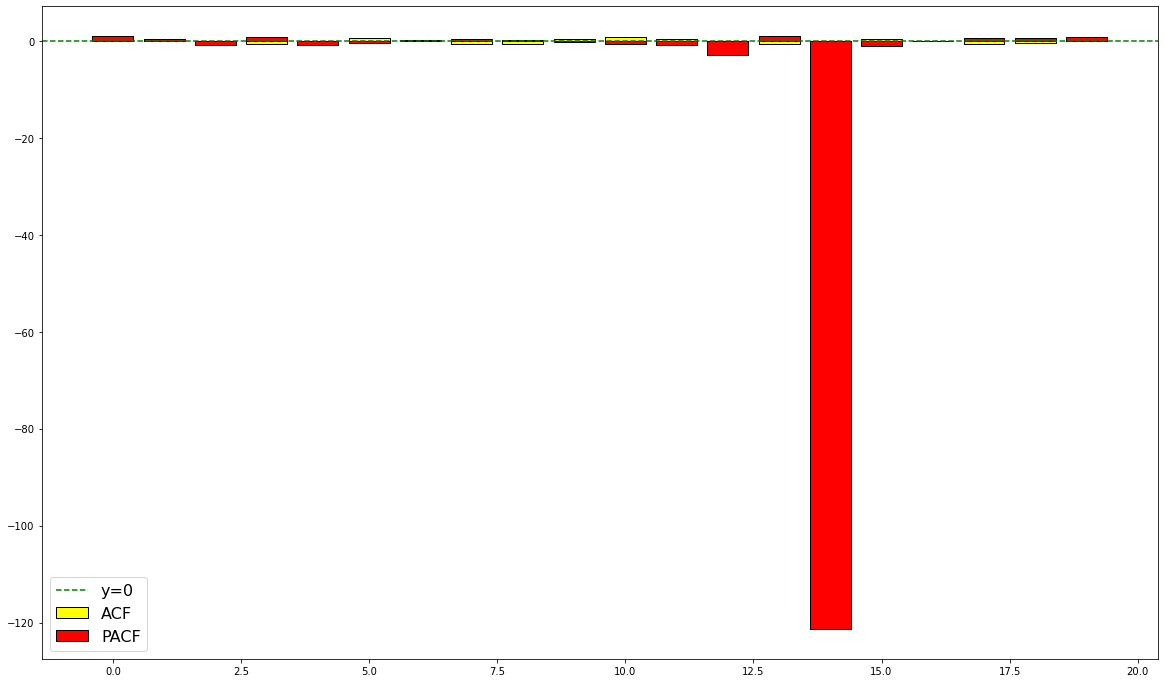

In [160]:
plt.figure(figsize=(20,12))
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags], color='yellow', edgecolor='black')
plt.bar(range(num_lags), pacf_vals[:num_lags], color='red' , edgecolor='black')
plt.axhline(y=0, color='green', linestyle='--')

plt.legend(('y=0', 'ACF', 'PACF'), fontsize=16)

print("p is 0 since it has no significant positive spikes")
print("d is 1 from the first difference")
print("q is 0 significant negative spikes")
print("P is 1 since it has a significant positive spike")
print("D is 0 from the first seasonal difference")
print("Q is 1 significant negative seasonal spikes")
print("m is 10 from the seasonal analysis")

In [161]:
# plt.figure(figsize=(20,10))
# plot_pacf(used_dataset)
# plt.show()

In [162]:
percent_test=80
percent_test=percent_test/100

time=new_time
time_point=time[round(len(used_dataset)*percent_test)]
time_point

train, test = used_dataset.loc[new_time <= time_point], used_dataset.loc[new_time > time_point]

print(f"Number of Training Data: {train.shape[0]}")
print(f"Number of Testing Data: {test.shape[0]}")

Number of Training Data: 160
Number of Testing Data: 39


In [163]:
order = (0,1,0)
seasonal_order = (1, 0, 1, 10)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)

model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.99558D-01    |proj g|=  1.22341D+00

At iterate    5    f= -4.89637D-01    |proj g|=  2.17988D-01

At iterate   10    f= -5.02035D-01    |proj g|=  7.04477D-01

At iterate   15    f= -6.71392D-01    |proj g|=  7.34724D-01

At iterate   20    f= -8.88956D-01    |proj g|=  7.50053D-01

At iterate   25    f= -9.47510D-01    |proj g|=  7.28086D-01

At iterate   30    f= -9.50237D-01    |proj g|=  2.32180D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     97      2     0     0   8.073D-03  -9.502D-01
  F = -0.95023795105665854     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                      SARIMAX Results                                       
Dep. Variable:                            amplitude   No. Observations:                  160
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 10)   Log Likelihood                 152.038
Date:                              Mon, 22 Aug 2022   AIC                           -298.076
Time:                                      17:47:27


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [164]:
predictions = model_fit.forecast(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test - predictions

Text(0, 0.5, 'Error')

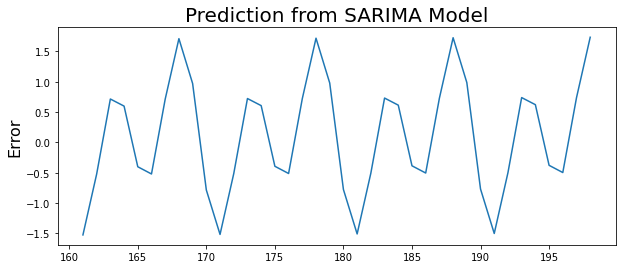

In [165]:
plt.figure(figsize=(10,4))
plt.plot(predictions)
#plt.axhline(0, linestyle='--', color='k')
plt.title('Prediction from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Error')

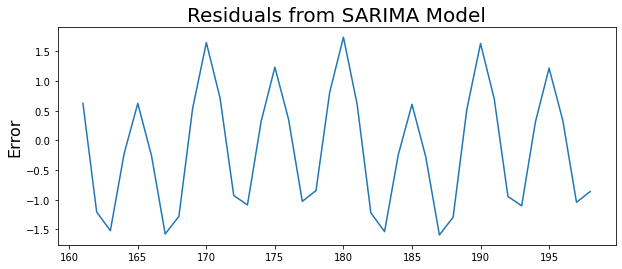

In [166]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
#plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

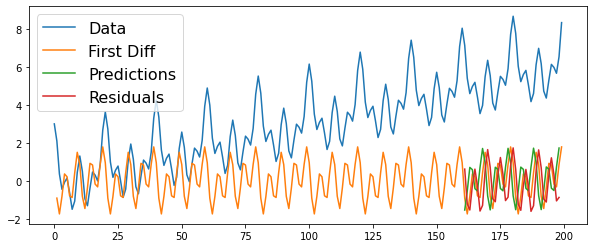

In [167]:
plt.figure(figsize=(10,4))

plt.plot(data)
plt.plot(first_diff)
plt.plot(predictions)
plt.plot(residuals)

plt.legend(('Data', 'First Diff', 'Predictions', 'Residuals'), fontsize=16)

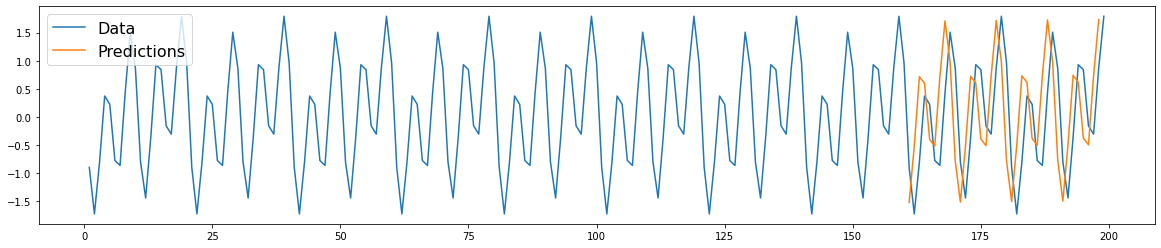

In [168]:
plt.figure(figsize=(20,4))

plt.plot(first_diff)
plt.plot(predictions)
#plt.plot(residuals)

plt.legend(('Data', 'Predictions', 'Residuals'), fontsize=16)

In [200]:
predictions # We have to try to integrate this to match the original data

161   -1.525196
162   -0.522905
163    0.714557
164    0.597663
165   -0.401806
166   -0.520855
167    0.712507
168    1.709156
169    0.970162
170   -0.784935
171   -1.517269
172   -0.515015
173    0.722403
174    0.605513
175   -0.393920
176   -0.512965
177    0.720353
178    1.716965
179    0.977998
180   -0.777035
181   -1.509342
182   -0.507124
183    0.730248
184    0.613362
185   -0.386035
186   -0.505075
187    0.728198
188    1.724774
189    0.985834
190   -0.769135
191   -1.501416
192   -0.499235
193    0.738092
194    0.621211
195   -0.378149
196   -0.497185
197    0.736043
198    1.732582
199         NaN
Name: predicted_mean, dtype: float64

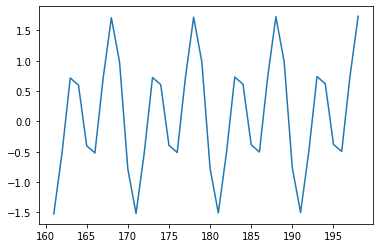

In [170]:
plt.plot(predictions)

In [206]:
y1= np.array(first_diff[0:160])
y2= np.array(predictions)
y = np.concatenate((y1, y2))
y

array([-0.89949357, -1.72865758, -0.8078498 ,  0.37068166,  0.22239893,
       -0.77760107, -0.86538632,  0.42821817,  1.50741039,  0.86443845,
       -0.8016066 , -1.44457854, -0.36538632,  0.92821817,  0.84043292,
       -0.15956708, -0.3078498 ,  0.87068166,  1.79148944,  0.96232542,
       -0.89949357, -1.72865758, -0.8078498 ,  0.37068166,  0.22239893,
       -0.77760107, -0.86538632,  0.42821817,  1.50741039,  0.86443845,
       -0.8016066 , -1.44457854, -0.36538632,  0.92821817,  0.84043292,
       -0.15956708, -0.3078498 ,  0.87068166,  1.79148944,  0.96232542,
       -0.89949357, -1.72865758, -0.8078498 ,  0.37068166,  0.22239893,
       -0.77760107, -0.86538632,  0.42821817,  1.50741039,  0.86443845,
       -0.8016066 , -1.44457854, -0.36538632,  0.92821817,  0.84043292,
       -0.15956708, -0.3078498 ,  0.87068166,  1.79148944,  0.96232542,
       -0.89949357, -1.72865758, -0.8078498 ,  0.37068166,  0.22239893,
       -0.77760107, -0.86538632,  0.42821817,  1.50741039,  0.86

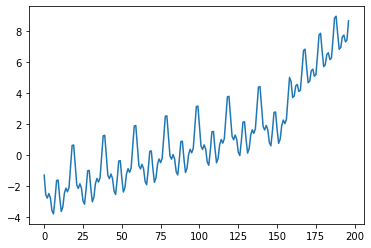

In [207]:
predictions_integral = cumulative_trapezoid(y)
plt.plot(predictions_integral)

In [208]:
predictions_integral=predictions_integral[np.logical_not(np.isnan(predictions_integral))]
predictions_integral

array([-1.31407558e+00, -2.58232927e+00, -2.80091334e+00, -2.50437305e+00,
       -2.78197412e+00, -3.60346781e+00, -3.82205188e+00, -2.85423760e+00,
       -1.66831318e+00, -1.63689725e+00, -2.75998982e+00, -3.66497225e+00,
       -3.38355633e+00, -2.49923078e+00, -2.15879786e+00, -2.39250630e+00,
       -2.11109037e+00, -7.80004825e-01,  5.96902604e-01,  6.28318531e-01,
       -6.85757046e-01, -1.95401074e+00, -2.17259481e+00, -1.87605452e+00,
       -2.15365559e+00, -2.97514928e+00, -3.19373335e+00, -2.22591907e+00,
       -1.03999465e+00, -1.00857872e+00, -2.13167129e+00, -3.03665372e+00,
       -2.75523779e+00, -1.87091225e+00, -1.53047933e+00, -1.76418777e+00,
       -1.48277184e+00, -1.51686294e-01,  1.22522113e+00,  1.25663706e+00,
       -5.74385148e-02, -1.32569221e+00, -1.54427628e+00, -1.24773599e+00,
       -1.52533706e+00, -2.34683075e+00, -2.56541482e+00, -1.59760054e+00,
       -4.11676116e-01, -3.80260190e-01, -1.50335276e+00, -2.40833519e+00,
       -2.12691926e+00, -

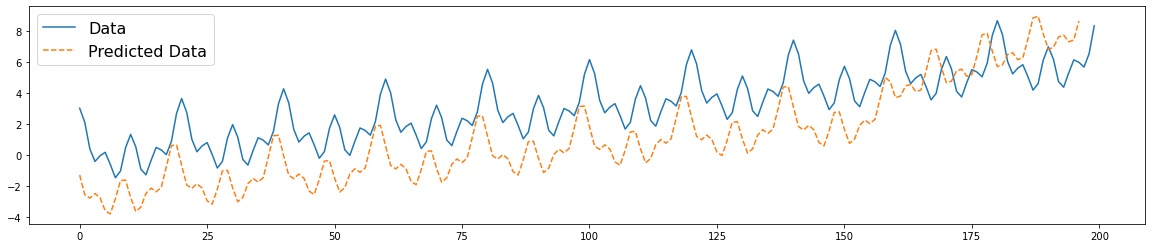

In [211]:
plt.figure(figsize=(20,4))

plt.plot(data)
plt.plot(predictions_integral, linestyle='--')
#plt.plot(residuals)

plt.legend(('Data', 'Predicted Data'), fontsize=16)

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test)),4))

Mean Absolute Percent Error: 1.4785


In [178]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.0208828532120908


# Using the Rolling Forecast Origin